## Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
sns.set_context("notebook")
sns.set_style("ticks")

In [19]:
# viridis gist_earth
def plot(fpaths, plot_type, x_label, y_label, hue_label, hue_order=None, palette="cividis", ylim=None):
    
    df_list = []
    for _fpath in fpaths:
        _df = pd.read_csv(_fpath)
        df_list.append(_df)
    
    if len(df_list) > 0:
        df = pd.concat(df_list, ignore_index=True)
        
        if plot_type == "barplot":
            sns.barplot(x=x_label, y=y_label, hue=hue_label, hue_order=hue_order, data=df, ci=100, palette=palette)
        elif plot_type == "lineplot":
            sns.lineplot(x=x_label, y=y_label, hue=hue_label, hue_order=hue_order, data=df, ci=100, err_style="bars", palette=palette)
        plt.ylim(ylim)
    sns.despine(top=True, right=True)

def aggregate_data(fpaths, group_labels, selection_labels, output_fpath):
    df_list = []
    for _fpath in fpaths:
        _df = pd.read_csv(_fpath)
        df_list.append(_df)
    
    if len(df_list) > 0:
        df = pd.concat(df_list, ignore_index=True)
        
        df.groupby(group_labels).mean().loc[:, selection_labels].to_csv(output_fpath)

## 1. Self-Comparison

In [20]:
fpaths_1 = sorted(glob(os.path.join("results_1_self_comparison", "*", "*", "raw_CRs_*.csv")))
fpaths_1

['results_1_self_comparison/BM100_ABS5_GU100_default/map-elites/raw_CRs_1210-225920.csv',
 'results_1_self_comparison/BM100_ABS5_GU100_default/mutation-kmeans/raw_CRs_1210-222516.csv',
 'results_1_self_comparison/BM100_ABS5_GU100_default/naive-kmeans/raw_CRs_1210-221922.csv',
 'results_1_self_comparison/BM200_ABS5_GU100_default/map-elites/raw_CRs_1210-230421.csv',
 'results_1_self_comparison/BM200_ABS5_GU100_default/mutation-kmeans/raw_CRs_1210-222734.csv',
 'results_1_self_comparison/BM200_ABS5_GU100_default/naive-kmeans/raw_CRs_1210-222004.csv',
 'results_1_self_comparison/BM300_ABS5_GU100_default/map-elites/raw_CRs_1210-120513.csv',
 'results_1_self_comparison/BM300_ABS5_GU100_default/mutation-kmeans/raw_CRs_1210-113226.csv',
 'results_1_self_comparison/BM300_ABS5_GU100_default/naive-kmeans/raw_CRs_1210-112613.csv',
 'results_1_self_comparison/BM400_ABS5_GU100_default/map-elites/raw_CRs_1210-120644.csv',
 'results_1_self_comparison/BM400_ABS5_GU100_default/mutation-kmeans/raw_CRs_12

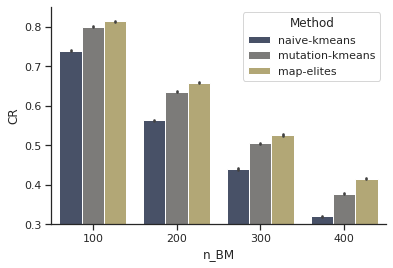

In [21]:
plot(fpaths_1, "barplot", "n_BM", "CR", "Method", ["naive-kmeans", "mutation-kmeans", "map-elites"], ylim=(0.3, 0.85))

In [22]:
fpaths_1_test_set = sorted(glob(os.path.join("results_1_self_comparison", "*", "raw_test_set_errors_*.csv")))
fpaths_1_test_set

['results_1_self_comparison/BM100_ABS5_GU100_default/raw_test_set_errors_1210-211927.csv',
 'results_1_self_comparison/BM200_ABS5_GU100_default/raw_test_set_errors_1210-212000.csv',
 'results_1_self_comparison/BM300_ABS5_GU100_default/raw_test_set_errors_1210-213900.csv',
 'results_1_self_comparison/BM400_ABS5_GU100_default/raw_test_set_errors_1210-213908.csv']

In [23]:
aggregate_data(fpaths_1_test_set, ["n_BM"], ["Absolute Elem-wise Error", "Absolute CR Error"], "1_self_comparison_test_set.csv")

## 2. Sample Efficiency

In [24]:
fpaths_2 = sorted(glob(os.path.join("results_2_sample_efficiency", "*", "*", "raw_CRs_*.csv")))
fpaths_2

['results_2_sample_efficiency/BM200_ABS5_GU100_default/map-elites/raw_CRs_1210-230421.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_default/mutation-kmeans/raw_CRs_1210-222734.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_default/naive-kmeans/raw_CRs_1210-222004.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_half/map-elites/raw_CRs_1210-230333.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_half/mutation-kmeans/raw_CRs_1210-222710.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_half/naive-kmeans/raw_CRs_1210-222006.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_third/map-elites/raw_CRs_1210-120601.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_third/mutation-kmeans/raw_CRs_1210-113325.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_third/naive-kmeans/raw_CRs_1210-112714.csv']

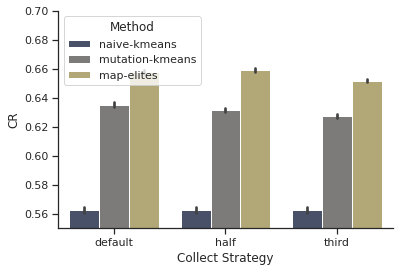

In [25]:
plot(fpaths_2, "barplot", "Collect Strategy", "CR", "Method", ["naive-kmeans", "mutation-kmeans", "map-elites"], ylim=(0.55, 0.7))

In [26]:
fpaths_2_test_set = sorted(glob(os.path.join("results_2_sample_efficiency", "*", "raw_test_set_errors_*.csv")))
fpaths_2_test_set

['results_2_sample_efficiency/BM200_ABS5_GU100_default/raw_test_set_errors_1210-212000.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_half/raw_test_set_errors_1210-212101.csv',
 'results_2_sample_efficiency/BM200_ABS5_GU100_third/raw_test_set_errors_1210-213933.csv']

In [27]:
aggregate_data(fpaths_2_test_set, ["Method"], ["Absolute Elem-wise Error", "Absolute CR Error"], "2_sample_efficiency_test_set.csv")

## 3. Adaptive to Variable Entities

### 3.1. Variable Number of ABSs

In [28]:
fpaths_3_var_ABS = sorted(glob(os.path.join("results_3_adaptive_to_variable_entities_var_ABS", "*", "*", "raw_CRs_*.csv")))
fpaths_3_var_ABS

['results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS10_GU100_default/map-elites/raw_CRs_1210-191339.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS10_GU100_default/mutation-kmeans/raw_CRs_1210-183256.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS10_GU100_default/naive-kmeans/raw_CRs_1210-181359.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS11_GU100_default/map-elites/raw_CRs_1210-202435.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS11_GU100_default/mutation-kmeans/raw_CRs_1210-194214.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS11_GU100_default/naive-kmeans/raw_CRs_1210-191831.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS12_GU100_default/map-elites/raw_CRs_1210-213546.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS12_GU100_default/mutation-kmeans/raw_CRs_1210-205300.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS12_GU100_default/n

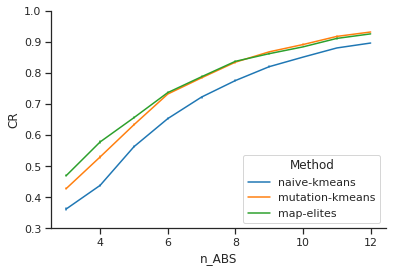

In [31]:
plot(fpaths_3_var_ABS, "lineplot", "n_ABS", "CR", "Method",  ["naive-kmeans", "mutation-kmeans", "map-elites"], ylim=(0.3, 1.), palette=None)

In [32]:
fpaths_3_var_ABS_interaction_set = sorted(glob(os.path.join("results_3_adaptive_to_variable_entities_var_ABS", "*", "raw_emulator_metrics_*.csv")))
fpaths_3_var_ABS_interaction_set

['results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS10_GU100_default/raw_emulator_metrics_1210-123832.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS11_GU100_default/raw_emulator_metrics_1210-124329.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS12_GU100_default/raw_emulator_metrics_1210-124337.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS3_GU100_default/raw_emulator_metrics_1210-122534.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS4_GU100_default/raw_emulator_metrics_1210-122607.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS5_GU100_default/raw_emulator_metrics_1210-122924.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS6_GU100_default/raw_emulator_metrics_1210-122931.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS7_GU100_default/raw_emulator_metrics_1210-123328.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS8_GU100_default/raw_emulat

In [33]:
aggregate_data(fpaths_3_var_ABS_interaction_set, ["n_ABS"], ["Absolute Elem-wise Error", "Absolute CR Error"], "3_adaptive_to_var_ABS_interaction.csv")

### 3.2. Variable Number of GUs

In [34]:
fpaths_3_var_GU = sorted(glob(os.path.join("results_3_adaptive_to_variable_entities_var_GU", "*", "*", "raw_CRs_*.csv")))
fpaths_3_var_GU

['results_3_adaptive_to_variable_entities_var_GU/BM200_ABS5_GU100_default/map-elites/raw_CRs_1210-142356.csv',
 'results_3_adaptive_to_variable_entities_var_GU/BM200_ABS5_GU100_default/mutation-kmeans/raw_CRs_1210-134710.csv',
 'results_3_adaptive_to_variable_entities_var_GU/BM200_ABS5_GU100_default/naive-kmeans/raw_CRs_1210-134008.csv',
 'results_3_adaptive_to_variable_entities_var_GU/BM200_ABS5_GU125_default/map-elites/raw_CRs_1210-151128.csv',
 'results_3_adaptive_to_variable_entities_var_GU/BM200_ABS5_GU125_default/mutation-kmeans/raw_CRs_1210-143356.csv',
 'results_3_adaptive_to_variable_entities_var_GU/BM200_ABS5_GU125_default/naive-kmeans/raw_CRs_1210-142612.csv',
 'results_3_adaptive_to_variable_entities_var_GU/BM200_ABS5_GU150_default/map-elites/raw_CRs_1210-155919.csv',
 'results_3_adaptive_to_variable_entities_var_GU/BM200_ABS5_GU150_default/mutation-kmeans/raw_CRs_1210-152202.csv',
 'results_3_adaptive_to_variable_entities_var_GU/BM200_ABS5_GU150_default/naive-kmeans/raw_CR

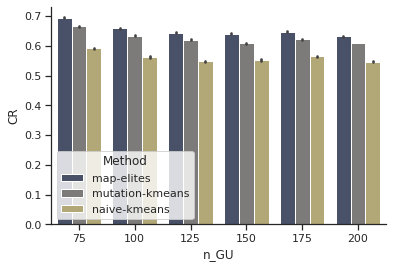

In [35]:
plot(fpaths_3_var_GU, "barplot", "n_GU", "CR", "Method")

In [36]:
fpaths_3_var_GU_interaction_set = sorted(glob(os.path.join("results_3_adaptive_to_variable_entities_var_ABS", "*", "raw_emulator_metrics_*.csv")))
fpaths_3_var_GU_interaction_set

['results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS10_GU100_default/raw_emulator_metrics_1210-123832.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS11_GU100_default/raw_emulator_metrics_1210-124329.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS12_GU100_default/raw_emulator_metrics_1210-124337.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS3_GU100_default/raw_emulator_metrics_1210-122534.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS4_GU100_default/raw_emulator_metrics_1210-122607.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS5_GU100_default/raw_emulator_metrics_1210-122924.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS6_GU100_default/raw_emulator_metrics_1210-122931.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS7_GU100_default/raw_emulator_metrics_1210-123328.csv',
 'results_3_adaptive_to_variable_entities_var_ABS/BM200_ABS8_GU100_default/raw_emulat

In [37]:
aggregate_data(fpaths_3_var_GU_interaction_set, ["n_ABS"], ["Absolute Elem-wise Error", "Absolute CR Error"], "3_adaptive_to_var_GU_interaction.csv")

## 4. Justification (Aggregate into 1 Table csv file)

In [38]:
fpaths_4 = sorted(glob(os.path.join("results_4_justification*", "*", "*", "processed_top_x_percentages_*.csv")))
fpaths_4

['results_4_justification_n_explore_10/BM200_ABS5_GU100_default/map-elites/processed_top_x_percentages_1210-150528.csv',
 'results_4_justification_n_explore_10/BM200_ABS5_GU100_default/mutation-kmeans/processed_top_x_percentages_1210-170957.csv',
 'results_4_justification_n_explore_20/BM200_ABS5_GU100_default/map-elites/processed_top_x_percentages_1210-145922.csv',
 'results_4_justification_n_explore_20/BM200_ABS5_GU100_default/mutation-kmeans/processed_top_x_percentages_1210-171802.csv',
 'results_4_justification_n_explore_30/BM200_ABS5_GU100_default/map-elites/processed_top_x_percentages_1210-150701.csv',
 'results_4_justification_n_explore_30/BM200_ABS5_GU100_default/mutation-kmeans/processed_top_x_percentages_1210-171404.csv',
 'results_4_justification_n_explore_40/BM200_ABS5_GU100_default/map-elites/processed_top_x_percentages_1210-150156.csv',
 'results_4_justification_n_explore_40/BM200_ABS5_GU100_default/mutation-kmeans/processed_top_x_percentages_1210-171259.csv']

In [39]:
aggregate_data(fpaths_4, ["Explore:Serve", "Method"], ["Top 1", "Top 2", "Top 3", "Top 5", "Top 10", "Top k"], "4_justification.csv")

## 6. Demo

In [40]:
import pickle
from pprint import pprint

In [41]:
def pkl2dict(pkl_fpath):
    with open(pkl_fpath, "rb") as f:
        loaded_dict = pickle.load(f)
    return loaded_dict

In [42]:
pkl_fpath = "results_dev_6/BM100_ABS5_GU100_default/map-elites/entities_statuses.pkl"
entities_statuses = pkl2dict(pkl_fpath)[0]

FileNotFoundError: [Errno 2] No such file or directory: 'results_dev_6/BM100_ABS5_GU100_default/map-elites/entities_statuses.pkl'

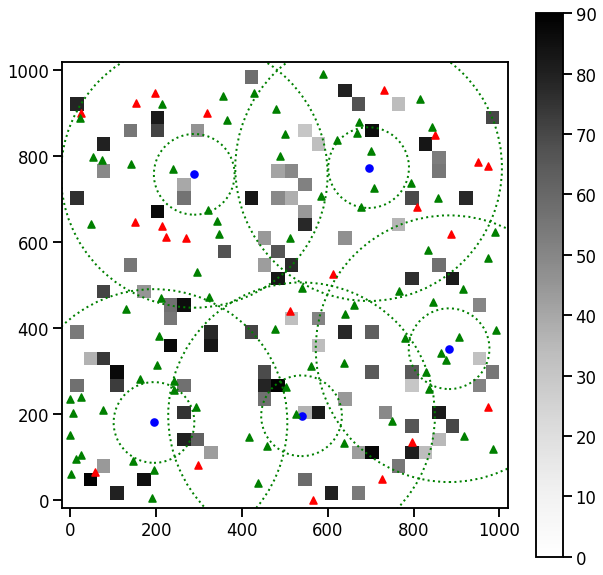

In [225]:
# plot BMs
world_len = 1000.
K = 32
granularity = world_len / K
y, x = np.meshgrid(np.linspace(0, world_len, K + 1), np.linspace(0, world_len, K + 1))
z = np.zeros((K, K))
for _bm in entities_statuses["BMs"]:
    i, j = np.clip(_bm.pos[:2] / granularity, 0, K-1).astype(np.int32)
    z[i, j] = _bm.pos[-1]
z_min, z_max = 0, 90

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal', adjustable='box')

# GnBu, Greys, PuBu
c = ax.pcolormesh(x, y, z, cmap="Greys", vmin=z_min, vmax=z_max)
ax.axis([-20, world_len + 20, -20, world_len + 20])
fig.colorbar(c, ax=ax)


# plot ABSs
n_ABS = len(entities_statuses["ABSs"])
ABS_locs = np.zeros((n_ABS, 2))
for i, _abs in enumerate(entities_statuses["ABSs"]):
    ABS_locs[i] = _abs.pos[:-1]
    NLoS_R_circle = plt.Circle(_abs.pos[:-1], _abs.R_2D_NLoS, ec='g', fill=False, ls=":", lw=2.)
    LoS_R_circle = plt.Circle(_abs.pos[:-1], _abs.R_2D_LoS, ec='g', fill=False, ls=":", lw=2.)
    ax.add_patch(NLoS_R_circle)
    ax.add_patch(LoS_R_circle)
x, y = ABS_locs.T
plt.scatter(x, y, color="b", s=50)

# plot GUs
UCGU_locs = []
CGU_locs = []
for _gu in entities_statuses["GUs"]:
    if len(_gu.covered_by) > 0:
        CGU_locs.append(_gu.pos[:-1])
    else:
        UCGU_locs.append(_gu.pos[:-1])
ux, uy = np.array(UCGU_locs).T
cx, cy = np.array(CGU_locs).T
plt.scatter(ux, uy, color="r", s=50, marker="^")
plt.scatter(cx, cy, color="g", s=50, marker="^")

plt.show()
    

In [59]:
import matplotlib.pyplot as plt
import numpy as np

y, x = np.meshgrid(np.linspace(-3, 3, 3), np.linspace(-3, 3, 3))
x.shape, y.shape

((3, 3), (3, 3))

In [60]:
x, y

(array([[-3., -3., -3.],
        [ 0.,  0.,  0.],
        [ 3.,  3.,  3.]]),
 array([[-3.,  0.,  3.],
        [-3.,  0.,  3.],
        [-3.,  0.,  3.]]))

In [37]:
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2) 

In [38]:
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

In [39]:
z.shape

(9, 9)

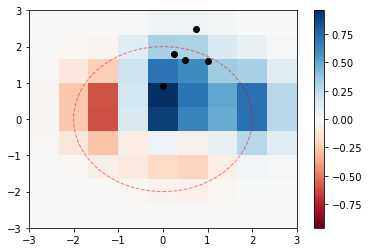

In [53]:
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap="RdBu", vmin=z_min, vmax=z_max)
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

x1 = np.linspace(0, 1, 5)
y1 = x1 + 2 * np.random.random(x1.shape)
plt.scatter(x1, y1, color='k')

circle = plt.Circle((0, 0), 2, ec='r', fill=False, ls="-.")
ax.add_patch(circle)
